In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
from scipy.optimize import minimize
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
A = np.array([
    [10, 15, 10], 
    [15, 20, 15],
    [13, 18, 11],
    [15, 15, 14],
    [14, 16, 13]
])

rate = np.zeros((A.shape[0]-1, A.shape[1]))
for i in range(rate.shape[0]):
    for j in range(rate.shape[1]):
        rate[i][j] = A[i+1][j]/A[i][j] - 1
n, m = rate.shape

mu = np.mean(rate, axis=0)
D = rate - mu
om = (D.T @ D) *1/n
print("1)a) Covariance matrix of return: ")
print(inv(om))


3
1)a) Covariance matrix of return: 
[[ 505.40144006 -157.391795   -347.41202632]
 [-157.391795     88.20495343   93.92524336]
 [-347.41202632   93.92524336  255.32288321]]


In [11]:
def markowitz_model1(om):
    e = np.ones((m, 1))
    sol = (inv(om) @ e)
    sol/=(e.T @ inv(om) @ e)
    return(sol.T)
ans = markowitz_model1(om)
print("1)b)I) Optimal portfolio weights according to Markowitz Model 1 are:")
print(ans) 

1)b) Optimal portfolio weights according to Markowitz Model 1 are:
[[0.02199382 0.91043323 0.06757295]]


In [32]:
def markowitz_model2(om, mu, R):
    e = np.ones((m, 1))
    numerator = np.array([[2*R, float(mu.T @ inv(om) @ e)], [2, float(e.T @ inv(om) @ e)]])
    denominator = np.array([[float(mu.T @ inv(om) @ mu), float(mu.T @ inv(om) @ e)],
                            [float(e.T @ inv(om) @ mu), float(e.T @ inv(om) @ e)]])
    lambda1 = det(numerator)/det(denominator)
    numerator = np.array([[float(mu.T @ inv(om) @ mu), 2*R], 
                            [float(e.T @ inv(om) @ mu), 2]])
    denominator = np.array([[float(mu.T @ inv(om) @ mu), float(mu.T @ inv(om) @ e)],
                            [float(e.T @ inv(om) @ mu), float(e.T @ inv(om) @ e)]])

    lambda2 = det(numerator)/det(denominator)
    sol = 0.5 * (lambda1 * (inv(om) @ mu) + lambda2 * (inv(om) @ e.reshape(m)))
    return sol
ans = markowitz_model2(om, mu, R=0.3)
print("1)b)II) Optimal portfolio weights according to Markowitz Model 2 are:")

1)b)II) Optimal portfolio weights according to Markowitz Model 2 are:
[ 7.48581885 -2.06285174 -4.42296711]
3


In [33]:
def markowitz_model3(om, mu, R):
    Objective = lambda w: w.T @ om @ w
    def equality(x):
        e = np.ones((m))
        return(e @ x - 1)
    def inequality(x):
        return(mu @ x - 0.3)

    b = (-np.inf, np.inf)
    temp=[]
    for i in range(m):
        temp.append(b)
    limit = tuple(temp)
    y = np.ones(m)
    constraint1 = {'type':'ineq', 'fun':inequality}
    constraint2 = {'type':'eq', 'fun':equality}
    constraints = ([constraint1, constraint2])
    sol = minimize(Objective, y, method='SLSQP', \
                        bounds=limit, constraints=constraints)
    return sol
ans = markowitz_model3(om, mu, R=0.3)
print("1)b)III) Optimal portfolio weights according to Markowitz Model 3 are:")
print(ans.x)

3
1)b)III) Optimal portfolio weights according to Markowitz Model 3 are:
[ 7.48581862 -2.06285169 -4.42296694]


1)c) The efficient frontier with the minimum variance point for Markowitz model 1 and 2 is as follows: 


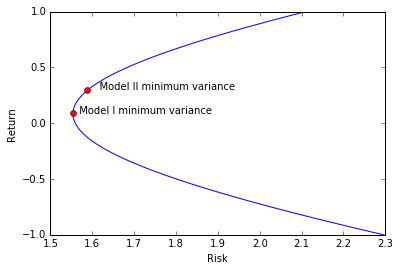

In [68]:
# Let R_1 = -1, R_2 = 1
A = np.array([
    [10, 15, 10], 
    [15, 20, 15],
    [13, 18, 11],
    [15, 15, 14],
    [14, 16, 13]
])
R_1 = -1.0
R_2 = 1.0
A = A.T[:2].T

rate = np.zeros((A.shape[0]-1, A.shape[1]))
for i in range(rate.shape[0]):
    for j in range(rate.shape[1]):
        rate[i][j] = A[i+1][j]/A[i][j] - 1

n, m = rate.shape
mu = np.mean(rate, axis=0)
D = rate - mu
# Covariance matrix of return
om = (D.T @ D) *1/n
e = np.ones((m, 1))
w_1 = markowitz_model2(om, mu, R_1)
w_2 = markowitz_model2(om, mu, R_2)

n = 100
l = np.linspace(0, 1, n)
ret = np.zeros(n)
risk = np.zeros(n) #[0]*n
risk1 = w_1.T@om@w_1 
risk2 = w_2.T@om@w_2

for i in range(n):
    ret[i] = l[i]*R_1 + (1 - l[i])*R_2
    risk[i] =  ((risk1 * l[i]**2) + (risk2 * (1 - l[i])**2))**0.5

#Calculating minimum variance points    
risk_model1 = risk[np.argmin(risk)]
ret_model1 = ret[np.argmin(risk)]
index = np.where(np.isclose(ret,0.3, 1e-1))[0]
risk_model2 = risk[index]

#Plotting the data on a graph
print("1)c) The efficient frontier with the minimum variance point for Markowitz model 1 and 2 is as follows: ")
fig = plt.plot(risk, ret, '-')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.plot(risk_model1, ret_model1, 'ro')
plt.annotate("  Model I minimum variance", (risk_model1, ret_model1))
plt.plot(risk_model2[1],0.3, 'ro')
plt.annotate("    Model II minimum variance", (risk_model2[1], 0.3))
plt.show()